## Performing Various ML Methods

### Task 2: Build and Train Various ML Models

In [6]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

This Notebook is structured in the following: 
<br><br> 1. Processed Data, with Features and Labels <br> 
2. Train\Validation for Hypertuning <br> 
3. Train\Validation\Test Performance (Accuracy)

In [8]:
# Preprocessed data from proj3_data_preprocess.ipynb
processed_X_train = pd.read_csv("clean_processed_train_data.csv")
processed_X_test = pd.read_csv("clean_processed_test_data.csv")
processed_X_val = pd.read_csv("clean_processed_validation_data.csv")

In [9]:
#display(processed_X_train.head(5), processed_X_test.head(5), processed_X_val.head(5))

In [10]:
X_train = processed_X_train.drop(columns=["satisfaction"], axis=1, inplace=False)
y_train = processed_X_train["satisfaction"]

X_test = processed_X_test.drop(columns=["satisfaction"], axis=1, inplace=False)
y_test = processed_X_test["satisfaction"]

X_val = processed_X_val.drop(columns=["satisfaction"], axis=1, inplace=False)
y_val = processed_X_val["satisfaction"]

#### Training/Validation evaluation for hypertuning:

##### Logistic Regression with 2 kernal tricks:

In [11]:
lr_model_ker = [
  ("Logistic Regression", Pipeline([
    ("lr", LogisticRegression(C=10, penalty="l2", solver="liblinear", max_iter=250))
  ])), 
  ("Logistic Regression Polynomial Kernel d=2", Pipeline([
    ("polynomial", PolynomialFeatures(2, include_bias=False)),
    ("lr_k1", LogisticRegression(C=1, penalty="l2", solver="liblinear", max_iter=250))
  ])),
  ("Logistic Regression Gaussian Kernel ", Pipeline([
    ("guassian", RBFSampler(gamma=0.01)),
    ("lr_k2", LogisticRegression(C=5, penalty="l2", solver="liblinear", max_iter=250))
  ]))
]

In [12]:
lr_model_results = []

for name, model in lr_model_ker:

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred) * 100

    lr_model_results.append((name, train_accuracy, val_accuracy))


In [13]:
sorted_lr_results = sorted(lr_model_results, key=lambda x: x[2], reverse=True)

for name, train_accuracy, val_accuracy in sorted_lr_results:
    print(f"{name}: Train Accuracy = {train_accuracy:.2f}%, Validation Accuracy = {val_accuracy:.2f}%")

Logistic Regression Polynomial Kernel d=2: Train Accuracy = 94.20%, Validation Accuracy = 93.50%
Logistic Regression Gaussian Kernel : Train Accuracy = 89.67%, Validation Accuracy = 90.20%
Logistic Regression: Train Accuracy = 87.31%, Validation Accuracy = 87.67%


##### SVM with 2 kernal tricks:

In [14]:
# Store SVM models in a list
svm_model_ker = [
    ("SVM Linear Kernel", SVC(kernel="linear")),
    ("SVM Polynomial d=2", SVC(C=0.75, kernel="poly", degree=2)),
    ("SVM Gaussian Kernel", SVC(kernel="rbf", C=5.0, gamma=0.05))
]

In [15]:
svm_model_results = []

for name, model in svm_model_ker:

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred) * 100

    svm_model_results.append((name, train_accuracy, val_accuracy))

In [16]:
sorted_svm_results = sorted(svm_model_results, key=lambda x: x[2], reverse=True)

for name, train_accuracy, val_accuracy in sorted_svm_results:
    print(f"{name}: Train Accuracy = {train_accuracy:.2f}%, Validation Accuracy = {val_accuracy:.2f}%")

SVM Gaussian Kernel: Train Accuracy = 96.58%, Validation Accuracy = 94.65%
SVM Polynomial d=2: Train Accuracy = 92.21%, Validation Accuracy = 91.26%
SVM Linear Kernel: Train Accuracy = 87.53%, Validation Accuracy = 88.02%


##### Decision Tree:

In [21]:
dt_model = [
  ("Decision Tree Classifier with Gini", DecisionTreeClassifier(criterion="gini", max_depth=12)), 
  ("Decision Tree Classifier with Entropy", DecisionTreeClassifier(criterion="entropy", max_depth=12))
]

In [22]:
dt_model_results = []

for name, model in dt_model:

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred) * 100

    dt_model_results.append((name, train_accuracy, val_accuracy))

In [23]:
for name, train_accuracy, val_accuracy in dt_model_results:
    print(f"{name}: Train Accuracy = {train_accuracy:.2f}%, Validation Accuracy = {val_accuracy:.2f}%")

Decision Tree Classifier with Gini: Train Accuracy = 96.43%, Validation Accuracy = 94.08%
Decision Tree Classifier with Entropy: Train Accuracy = 96.46%, Validation Accuracy = 94.54%


#### Random Forest: 

In [24]:
rf_model = [
  ("Random Forest Classifier", RandomForestClassifier(n_estimators=35, max_features=12, min_samples_leaf=10))
]

In [25]:
rf_model_results = []

for name, model in rf_model:

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred) * 100

    rf_model_results.append((name, train_accuracy, val_accuracy))

In [26]:
for name, train_accuracy, val_accuracy in rf_model_results:
    print(f"{name}: Train Accuracy = {train_accuracy:.2f}%, Validation Accuracy = {val_accuracy:.2f}%")

Random Forest Classifier: Train Accuracy = 96.60%, Validation Accuracy = 95.35%


##### Nueral Network:

In [27]:
class SimpleModel(nn.Module):
    def __init__(self, input_size):

        super().__init__()

        self.fc_1 = nn.Linear(in_features=input_size, out_features=28)
        self.fc_2 = nn.Linear(in_features=28, out_features=28)
        self.fc_3 = nn.Linear(in_features=28, out_features=14)
        self.fc_4 = nn.Linear(in_features=14, out_features=1)

        # Activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        temp = self.relu(self.fc_1(x))
        temp = self.relu(self.fc_2(temp))
        temp = self.relu(self.fc_3(temp))
        temp = self.fc_4(temp)
        return self.sigmoid(temp.squeeze())

In [28]:
def train_step(model, X_train, y_train, loss_fn, optimizer, device):

    model.train()

    X_train, y_train = X_train.to(device), y_train.to(device)
    y_train_logit = model(X_train)

    train_loss = loss_fn(y_train_logit, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Compute accuracy
    y_train_predicted = torch.round(y_train_logit)
    correct = torch.eq(y_train_predicted, y_train).sum().item()
    train_acc = (correct / len(y_train_predicted)) * 100

    return train_loss.item(), train_acc    

In [29]:
def evaluation_step(model, X_eval, y_eval, loss_fn, device):

    model.eval()
    X_eval, y_eval = X_eval.to(device), y_eval.to(device)

    with torch.inference_mode():

        y_eval_logit = model(X_eval)

        eval_loss = loss_fn(y_eval_logit, y_eval)

        # Compute accuracy
        y_eval_predicted = torch.round(y_eval_logit)
        correct = torch.eq(y_eval_predicted, y_eval).sum().item()
        eval_acc = (correct / len(y_eval_predicted)) * 100

    return eval_loss.item(), eval_acc

In [30]:
def train_simple_model(X_train, y_train, X_eval, y_eval, random_seed):

	device = "cpu" 
	if torch.cuda.is_available(): 
			device = "cuda"
	else:
			if torch.backends.mps.is_available():
					device = "mps" 

	X_train = torch.tensor(X_train.values, dtype=torch.float32, device=device)
	y_train = torch.tensor(y_train.values, dtype=torch.float32, device=device)
	X_eval = torch.tensor(X_eval.values, dtype=torch.float32, device=device)
	y_eval = torch.tensor(y_eval.values, dtype=torch.float32, device=device)

	torch.manual_seed(random_seed)
	num_epochs = 250

	model = SimpleModel(input_size=X_train.shape[1]).to(device)
	loss_fn = nn.BCELoss()
	optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.0001)
	scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

	for epoch in range(num_epochs):

		train_loss, train_acc = train_step(model, X_train, y_train, loss_fn, optimizer, device)
		eval_loss, eval_acc = evaluation_step(model, X_eval, y_eval, loss_fn, device)

		scheduler.step()

	return train_acc, eval_acc

In [31]:
def NN_results_average(X_train, y_train, X_eval, y_eval):

  avg_train_accuracy = []
  avg_eval_accuracy = []

  random_seeds = [17, 38, 7, 10, 21, 55, 88, 2, 71, 11]

  for random_seed in random_seeds:
    train_acc, eval_acc = train_simple_model(X_train, y_train, X_eval, y_eval, random_seed)

    avg_train_accuracy.append(train_acc)
    avg_eval_accuracy.append(eval_acc)

  results_train_avg = np.mean(avg_train_accuracy)
  results_eval_avg = np.mean(avg_eval_accuracy)

  return results_train_avg, results_eval_avg

In [32]:
avg_train_acc, avg_val_acc  = NN_results_average(X_train, y_train, X_val, y_val)
print(f"Using 10 random_seeds: \n Average Train Accuracy: {avg_train_acc:.2f}%"
      f"\n Average Validation Accuracy: {avg_val_acc:.2f}%")


Using 10 random_seeds: 
 Average Train Accuracy: 96.67%
 Average Validation Accuracy: 95.01%


#### Train/Testing Performance Evaluation:

In [33]:
models = [
  ("Logistic Regression", Pipeline([
    ("lr", LogisticRegression(C=0.1, penalty="l2", solver="liblinear", max_iter=250))
  ])), 
  ("Logistic Regression Polynomial Kernel d=2", Pipeline([
    ("polynomial", PolynomialFeatures(2, include_bias=False)),
    ("lr_k1", LogisticRegression(C=10, penalty="l2", solver="liblinear", max_iter=250))
  ])),
  ("Logistic Regression Gaussian Kernel ", Pipeline([
    ("guassian", RBFSampler(gamma=0.01)),
    ("lr_k2", LogisticRegression(C=5, penalty="l2", solver="liblinear", max_iter=250))
  ])),
  ("SVM Linear Kernel", SVC(kernel="linear")),
  ("SVM Polynomial d=2", SVC(C=0.75, kernel="poly", degree=2)),
  ("SVM Gaussian Kernel", SVC(kernel="rbf", C=5.0, gamma=0.05)),
  ("Decision Tree Classifier with Gini", DecisionTreeClassifier(criterion="gini", max_depth=12)), 
  ("Decision Tree Classifier with Entropy", DecisionTreeClassifier(criterion="entropy", max_depth=12)),
  ("Random Forest Classifier", RandomForestClassifier(n_estimators=35, max_features=12, min_samples_leaf=10))
]

In [34]:
models_results = []
roc_curves = []

for name, model in models:

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred) * 100
    
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100

    models_results.append((name, train_accuracy, test_accuracy, val_accuracy))

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr_test, tpr_test, ths_test = roc_curve(y_test, y_proba)
    auc_test = auc(fpr_test, tpr_test)
    roc_curves.append((name, fpr_test, tpr_test, auc_test))


In [35]:
avg_train_acc, avg_test_acc = NN_results_average(X_train, y_train, X_test, y_test)
_, avg_val_acc  = NN_results_average(X_train, y_train, X_val, y_val)
models_results.append(("Neural Networks", avg_train_acc, avg_test_acc, avg_val_acc))

In [36]:
sorted_models_results = sorted(models_results, key=lambda x: x[2], reverse=True)

In [37]:
performance_models = pd.DataFrame(sorted_models_results, columns=["Model", "Train Accuracy (%)", "Testing Accuracy (%)", "Validation Accuracy (%)"])
performance_models.round(2)

,Model,Train Accuracy (%),Testing Accuracy (%),Validation Accuracy (%)
0,Random Forest Classifier,96.60,95.33,95.22
1,Neural Networks,96.67,95.28,95.01
2,SVM Gaussian Kernel,96.58,95.25,94.65
3,Decision Tree Classifier with Entropy,96.45,94.38,94.44
4,Decision Tree Classifier with Gini,96.43,94.08,94.05
5,Logistic Regression Polynomial Kernel d=2,94.17,93.76,93.54
6,SVM Polynomial d=2,92.21,92.08,91.26
7,Logistic Regression Gaussian Kernel,90.13,90.08,90.08
8,SVM Linear Kernel,87.53,87.68,88.02
9,Logistic Regression,87.32,87.47,87.61


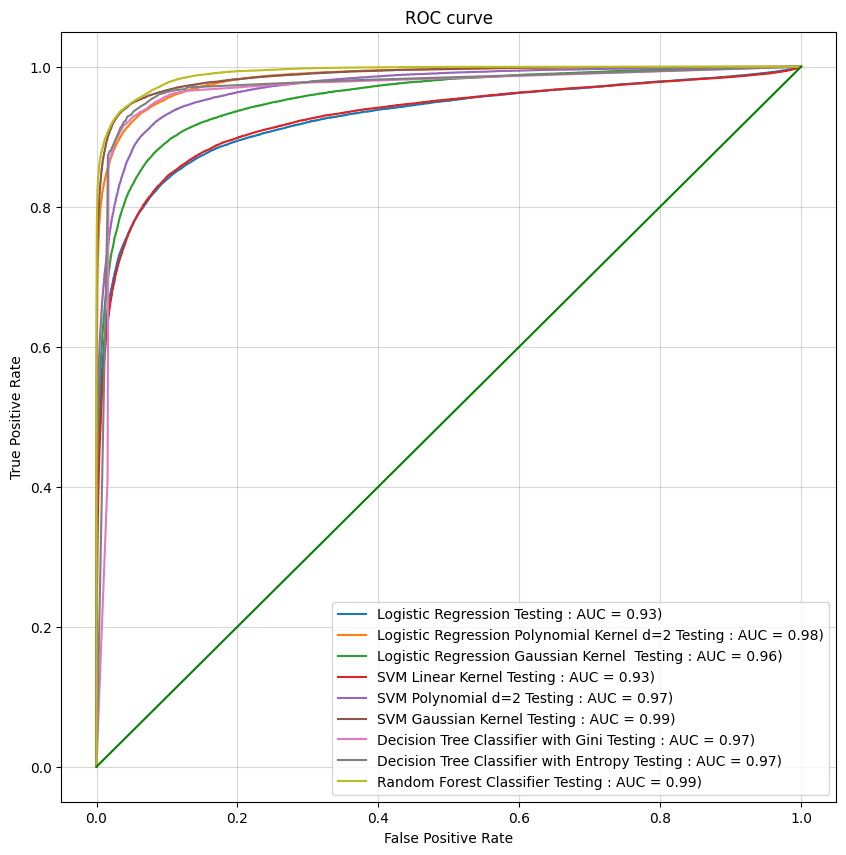

In [38]:
plt.figure(figsize=(10, 10))

for name, fpr, tpr, auc in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} Testing : AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], color="green")

plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(alpha=0.5)
plt.legend(loc="lower right")
plt.show()